## Predicting Land Lot Price Project

#### This project is dedicated to predicting a land lot value based on the data that is parsed from KupiPai site

#### Feature description:
* status - selling status of the land lot, categorical
* statusDisplay - text representation of the selling status of the land lot
* identifier - some kind of identifier
* description - lot's text description (to remove)
* cadaster - lot's cadaster identifier 
* currency - lot's price currency
* price - the lot's price, a target feature
* basePrice - the feature with the same values as the price feature
* pricePerOne - looks like this is the price per one unit of measure
* estimatePrice - not clear what it is, but let's keep it for now
* estimateDate - not sure what it means, but it is definitely a date in the past. Maybe the date when this lot came to the market
* lastRentPayDate - probably the date when the last rent should have been or would be paid according to the contract
* rentRate - not sure what it is
* baseRentRate - something similar to rentRate
* rentRateClean - probably rentRate after taxes
* baseRentRateClean - probably baseRentRate after taxes
* rentalYield - land lot profitability
* rentPeriod - most probably period of rent. However, the values are strange
* purpose - the objective of using a land lot
* ownership - the type of ownership
* koatuuLocation - lot location by KOATUU
* geoPath - numeric representation of KOATUU location feature
* geoLocation - geo location of a land lot
* geoCoordinates - geo coordinates of a land lot
* ownerType - the type of the owner. It's not clear what it means, no variability however
* ownerEdrpou - EDRPOU code of the owner. As long as each person has it's own EDRPOU code, the repeating value of this feature in the dataset means that one and the same owner sells several land lots
* ownerName - the name of the owner of the land lot
* ownerPhone - the phone number of the owner
* renterCompany - some kind of a characteristic of a renter company
* renterType - type of a renter, no variability
* renterEdrpou - EDRPOU code of the owner. As long as each company has it's own EDRPOU code, the repeating value of this feature in the dataset means that one and the same company rents several land lots
* renterName - the name of the renter
* renterContactName - a contact person on the renter side
* renterContactPhone - a contact phone of a contact person on the renter side
* canEdit - a purely technical feature
* author - a purely technical feature with all missing values
* owner - another technical feature without variability
* isAvailable - looks like a marker of the land lot availability

## Libraries import and loading dataset

In [121]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

from scipy.stats.mstats import winsorize

In [122]:
df = pd.read_csv('land_lots.csv')

## Necessary functions

In [123]:
# A function that calculates the number of outliers
def detect_outliers(data):
    outliers_num = 0
    outliers_list = []
    
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    IQR = q3-q1
    
    lower_lim = q1 - 1.5*IQR
    upper_lim = q3 + 1.5*IQR
    
    for item in data:
        if item < lower_lim or item > upper_lim:
            outliers_list.append(item)
            outliers_num += 1
    
    print(f'Number of outliers are {outliers_num}')
    print(f'The outliers are {outliers_list}')
    print(f'Upper limit is {upper_lim}')
    print(f'Lower limit is {lower_lim}')
    

# A function that removes rows with the oultiers 
def remove_outliers(data, column):
    print('The number of rows before removing outliers is ', len(data))
    
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    
    IQR = q3-q1
    
    lower_lim = q1 - 1.5*IQR
    upper_lim = q3 + 1.5*IQR    
    
    for item in data[column]:        
        if item < lower_lim or item > upper_lim:
            data.drop(df.loc[df[column]==item].index, inplace = True)
    print('The number of rows after removing outliers is ', len(data))
    return data

In [124]:
df.head()

,id,status,statusDisplay,identifier,description,cadastre,currency,price,basePrice,pricePerOne,...,renterType,renterEdrpou,renterName,renterContactName,renterContactPhone,canEdit,author,owner,isAvailable,gallary
0,740,3,Активне,AD-30122021-740,NaN,3222055100:02:003:0298,UAH,120000,120000,61137,...,2,41102844,"ТОВ ""Виробниче підприємство ""Полісся""",Кохно Юрій Антонович,3.806755e+11,False,NaN,"{'id': 6, 'title': 'ULF', 'avatar': '/uploads/...",True,[]
1,739,3,Активне,AD-30122021-739,NaN,3222086800:05:003:0195,UAH,60000,60000,53893,...,2,41102844,"ТОВ ""Виробниче підприємство ""Полісся""",Кохно Юрій Антонович,3.806755e+11,False,NaN,"{'id': 6, 'title': 'ULF', 'avatar': '/uploads/...",True,[]
2,738,4,В процесі укладання угоди купівлі-продажу,AD-29122021-738,NaN,5625880800:06:003:0258,UAH,73499,73499,39914,...,2,41099127,"ТОВ ""Західна Агровиробнича компанія""",Мазур Олексій Михайлович,3.806716e+11,False,NaN,"{'id': 6, 'title': 'ULF', 'avatar': '/uploads/...",False,[]
3,737,3,Активне,AD-29122021-737,NaN,6525082500:07:029:0018,UAH,680000,680000,67156,...,2,41101589,"ТОВ ""ЮТС-Агропродукт""",Семенчук Оксана Олександрівна,3.806721e+11,False,NaN,"{'id': 6, 'title': 'ULF', 'avatar': '/uploads/...",True,[]
4,736,3,Активне,AD-29122021-736,NaN,6525085600:06:052:0009,UAH,385000,385000,67444,...,2,41101589,"ТОВ ""ЮТС-Агропродукт""",Семенчук Оксана Олександрівна,3.806721e+11,False,NaN,"{'id': 6, 'title': 'ULF', 'avatar': '/uploads/...",True,[]


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  476 non-null    int64  
 1   status              476 non-null    int64  
 2   statusDisplay       476 non-null    object 
 3   identifier          476 non-null    object 
 4   description         9 non-null      object 
 5   cadastre            476 non-null    object 
 6   currency            476 non-null    object 
 7   price               476 non-null    int64  
 8   basePrice           476 non-null    int64  
 9   pricePerOne         476 non-null    int64  
 10  basePricePerOne     476 non-null    int64  
 11  estimatePrice       476 non-null    int64  
 12  estimateDate        473 non-null    object 
 13  lastRentPayDate     475 non-null    object 
 14  rentRate            476 non-null    int64  
 15  baseRentRate        476 non-null    int64  
 16  rentRate

In [126]:
df[df.description.notnull()]

,id,status,statusDisplay,identifier,description,cadastre,currency,price,basePrice,pricePerOne,...,renterType,renterEdrpou,renterName,renterContactName,renterContactPhone,canEdit,author,owner,isAvailable,gallary
193,503,3,Активне,AD-01112021-503,Два співвласники,6525085600:06:053:0004,UAH,380000,380000,61955,...,2,41101589,"ТОВ ""ЮТС-Агропродукт""",Семенчук Оксана Олександрівна,3.806721e+11,False,NaN,"{'id': 6, 'title': 'ULF', 'avatar': '/uploads/...",True,[]
203,492,4,В процесі укладання угоди купівлі-продажу,AD-24102021-492,Два співвласника:\nЖебуль Володимир Миколайови...,5320485500:00:001:0165,UAH,208000,208000,60040,...,2,41103827,"ТОВ ""Агро-Край""",Щур Вікторія Вікторівна,3.806751e+11,False,NaN,"{'id': 6, 'title': 'ULF', 'avatar': '/uploads/...",False,[]
234,449,3,Активне,AD-19102021-449,Два співвласника:\nГончаренко Наталя Петрівна ...,4820982400:03:000:0142,UAH,20000,20000,57142,...,2,41107067,"ТОВ ""Південь Агро Інвест""",Люц Вікторія Юріївна,3.806751e+11,False,NaN,"{'id': 6, 'title': 'ULF', 'avatar': '/uploads/...",True,[]
235,448,3,Активне,AD-19102021-448,Два співвласника:\nГончаренко Наталя Петрівна ...,4820982400:03:000:0036,UAH,480000,480000,44058,...,2,41107067,"ТОВ ""Південь Агро Інвест""",Люц Вікторія Юріївна,3.806751e+11,False,NaN,"{'id': 6, 'title': 'ULF', 'avatar': '/uploads/...",True,[]
283,391,3,Активне,AD-06102021-391,Три співвласника:\nКолісник Валентина Василівн...,5320483000:00:001:0212,UAH,130000,130000,58711,...,2,41103827,"ТОВ ""Агро-Край""",Щур Вікторія Вікторівна,3.806751e+11,False,NaN,"{'id': 6, 'title': 'ULF', 'avatar': '/uploads/...",True,[]
312,341,4,В процесі укладання угоди купівлі-продажу,AD-24092021-32,Усі нотаріальні послуги оплачує інвестор,7422781000:02:003:0743,UAH,10843,10843,13540,...,2,41105190,"ТОВ ""Гетьманське""",Третьяков Віталій Васильович,3.806754e+11,False,NaN,"{'id': 6, 'title': 'ULF', 'avatar': '/uploads/...",False,[]
372,239,4,В процесі укладання угоди купівлі-продажу,AD-10092021-1,5 співвласників:\nОлефіренко Лідія Олексіївна ...,5920380800:01:001:0219,UAH,150000,150000,45344,...,2,34264631,"ТОВ ""Райз Північ""",NaN,NaN,False,NaN,"{'id': 6, 'title': 'ULF', 'avatar': '/uploads/...",False,[]
427,147,3,Активне,AD-13082021-31,Два співвласника по 50%:\r\nГрищеня Наталія Пе...,6523584000:04:001:0013,UAH,480000,480000,69064,...,2,41101589,"ТОВ ""ЮТС-Агропродукт""",Семенчук Оксана Александровна,3.806721e+11,False,NaN,"{'id': 6, 'title': 'ULF', 'avatar': '/uploads/...",True,[]
475,47,4,В процесі укладання угоди купівлі-продажу,AD-21072021-3,У ділянки два співвласника по 50%:\r\nДругий с...,6324283500:02:001:0673,UAH,190642,190642,43334,...,2,34264631,"ТОВ ""Райз Північ""",NaN,NaN,False,NaN,"{'id': 6, 'title': 'ULF', 'avatar': '/uploads/...",False,[]


Almost all values of the **description** feature are NA, so we can safely remove it

In [127]:
df.drop(['description'], axis = 1, inplace = True)

In [128]:
# status
df.status.value_counts()

3    361
4    115
Name: status, dtype: int64

In [129]:
# statusDisplay
df.statusDisplay.value_counts()

Активне                                      361
В процесі укладання угоди купівлі-продажу    115
Name: statusDisplay, dtype: int64

It looks like the statusDisplay feature is only the text representation of the selling status, so we can get rid of it

In [130]:
df.drop(['statusDisplay'], axis = 1, inplace = True)

In [131]:
# identifier - as long as this feature doesn`t make any sense, let`s remove it
df.drop(['identifier'], axis = 1, inplace = True)

In [132]:
# cadaster is a unique identifier, but we can get the info about region from cadaster feature
df['cadastre'] = df['cadastre'].apply(lambda x: x.split(':')[0])

In [133]:
# currency
df['currency'].value_counts()

UAH    476
Name: currency, dtype: int64

There is no feature variability for  the currency feature, so let's remove it

In [134]:
df.drop(['currency'], axis = 1, inplace = True)

The feature **price** is a target feature

The following feature a **basePrice** seems to be the same as the **price** feature. Let's check it with corr function

In [135]:
df['price'].corr(df['basePrice'])

1.0

As was expected we got a 1 as a correlation, so these features have the same value and hence we can remove **basePrice** feature

In [136]:
df.drop(['basePrice'], axis = 1, inplace = True)

The feature **pricePerOne** seems to be the price per one unit of measure of the lot. Let's validate this assumption with the following expression:

In [137]:
df['pricePerOne'].iloc[0] == int(df['price'].iloc[0]/df['area'].iloc[0])

True

Well, our assumption is correct. Anyway the **pricePerOne** feature looks quite promising, so let's keep it for now for the futher analysis

The feature **basePricePerOne** seems to be the similar situation as it was with **price** and **basePrice**. Let's check the assumption that these two features(**basePricePerOne** and **pricePerOne**) are similar

In [138]:
df['pricePerOne'].corr(df['basePricePerOne'])

1.0

The assumption is correct, so we can get rid of **basePricePerOne** feature

In [139]:
df.drop(['basePricePerOne'], axis = 1, inplace = True)

In [140]:
# estimatePrice
df['estimatePrice'].value_counts()

2891      3
53042     3
20353     2
5527      2
122002    2
         ..
71006     1
76050     1
64854     1
2388      1
72702     1
Name: estimatePrice, Length: 462, dtype: int64

It's not clear what this feature means for now, bit let's keep it for the future analysis

In [141]:
# estimateDate
df['estimateDate'].value_counts()

2021-01-01    40
2019-01-01    38
2021-08-18    15
2021-09-13    13
2021-09-08    13
              ..
2021-07-05     1
2021-10-19     1
2021-07-21     1
2021-12-02     1
2020-01-02     1
Name: estimateDate, Length: 119, dtype: int64

As long as **estimateDate** feature has few some missing values, I suggest to remove the rows with these missing values

In [142]:
df = df[df['estimateDate'].notna()]

In [143]:
df.shape

(473, 36)

Now let's convert engineer some new features from this **estimateDate** feature. First let's extract month and day from this estimate feature

In [144]:
df['estimateMonth'] = df['estimateDate'].apply(lambda x: int(x.split('-')[1]))

In [145]:
df['estimateMonth'].value_counts()

9     107
1      85
8      78
7      53
10     53
11     47
12     24
2      11
3       6
4       6
5       3
Name: estimateMonth, dtype: int64

In [146]:
df['estimateDay'] = df['estimateDate'].apply(lambda x: int(x.split('-')[2]))

In [147]:
df['estimateDay'].value_counts()

1     94
29    31
20    28
8     27
30    22
13    22
18    19
26    14
3     14
6     14
28    13
10    13
22    13
5     12
19    12
23    11
17    11
2     10
27    10
25     9
16     9
9      9
21     7
15     7
24     7
12     7
11     7
31     7
4      6
7      5
14     3
Name: estimateDay, dtype: int64

In [148]:
df['estimateYear'] = df['estimateDate'].apply(lambda x: int(x.split('-')[0]))

In [149]:
df['estimateYear'].value_counts()

2021    398
2019     44
2020     31
Name: estimateYear, dtype: int64

Now let's figure out the difference between the current date and the **estimateDate** in days. For this let's convert **estimateDate** feature into datetime format first

In [150]:
df['estimateDate'] = df['estimateDate'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [151]:
type((datetime.datetime.now() - df['estimateDate'].iloc[0]).days)

int

In [152]:
df['daysDelta'] = df['estimateDate'].apply(lambda x: (datetime.datetime.now() - x).days)

In [153]:
df['daysDelta'].value_counts()

415     40
1146    38
186     15
160     13
165     13
        ..
685      1
174      1
689      1
187      1
1020     1
Name: daysDelta, Length: 119, dtype: int64

Now we can safely remove **estimateDate** feature

In [154]:
df.drop(['estimateDate'], axis = 1, inplace = True)

Now let's look at another feature which is representing the date - **lastRentPayDate**. With this feature let's do the same - extract the date, get a delta between the current date and the last rent pay date in days and remove the original feature

In [155]:
df['lastRentPayDate'].value_counts()

2021-12-31    273
2021-07-01     50
2020-10-01     43
2021-04-01     42
2020-12-31     23
2022-12-31     17
2022-01-01      5
2021-10-01      5
2024-12-31      5
2023-12-31      3
2026-01-01      1
2024-01-01      1
2021-08-20      1
2021-11-10      1
2021-08-12      1
2021-09-21      1
2023-01-01      1
Name: lastRentPayDate, dtype: int64

In [156]:
df['lastRentPayDate'] = df['lastRentPayDate'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [157]:
df['daysRentPayDelta'] = df['lastRentPayDate'].apply(lambda x: (x - datetime.datetime.now()).days)

In [158]:
df['daysRentPayDelta'].value_counts()

-52      273
-235      50
-508      43
-326      42
-417      23
 313      17
-51        5
 1044      5
-143       5
 678       3
 679       1
-193       1
-153       1
 314       1
 1410      1
-103       1
-185       1
Name: daysRentPayDelta, dtype: int64

It looks like we can add another binary feature based on the previous generated **daysRentPayDelta** feature. If it has a positive sign, let it be 1, ottherwise, let it be 0.

In [159]:
df['daysRentPayDeltaSign'] = df['daysRentPayDelta'].apply(lambda x: 1 if x > 0 else 0)

In [160]:
df['daysRentPayDeltaSign'].value_counts()

0    445
1     28
Name: daysRentPayDeltaSign, dtype: int64

In [161]:
df.drop(['lastRentPayDate'], axis = 1, inplace = True)

In [162]:
df.shape

(473, 40)

In [163]:
# rentRate
df['rentRate'].value_counts()

19893    22
7214      9
15783     6
6892      5
8187      5
         ..
60        1
22719     1
7825      1
195       1
27646     1
Name: rentRate, Length: 310, dtype: int64

I'm not sure what this feature is about, but let's keep it for now

In [164]:
# baseRentRate
df['baseRentRate'].value_counts()

19893    22
7214      9
15783     6
6892      5
8187      5
         ..
60        1
22719     1
7825      1
195       1
27646     1
Name: baseRentRate, Length: 310, dtype: int64

It seems that the features **rentRate** and **baseRentRate** have similar values, so let's get rid from the last one

In [165]:
df.drop(['baseRentRate'], axis = 1, inplace = True)

In [166]:
# rentRateClean
df['rentRateClean'].value_counts()

16014    22
5807      9
12705     6
18051     6
2474      5
         ..
3772      1
4797      1
13503     1
192       1
3069      1
Name: rentRateClean, Length: 307, dtype: int64

In [167]:
# baseRentRateClean
df['baseRentRateClean'].value_counts()

16014    22
5807      9
12705     6
18051     6
2474      5
         ..
3772      1
4797      1
13503     1
192       1
3069      1
Name: baseRentRateClean, Length: 307, dtype: int64

Again, let's remove the redundunt feature

In [168]:
df.drop(['baseRentRateClean'], axis = 1, inplace = True)

It also looks lie features **rentRateClean** and **rentRate** may have a big positive correlation. Let's check it

In [169]:
df['rentRate'].corr(df['rentRateClean'])

0.9999999990297495

As you can see the correlation between these two features are close to 1, so we can definitely remove one of them

In [170]:
df.drop(['rentRateClean'], axis = 1, inplace = True)

In [171]:
#rentalYield
df['rentalYield'].value_counts()

3.8     19
3.6     17
4.8     15
4.2     15
5.3     13
        ..
1.4      1
1.5      1
10.2     1
8.0      1
7.4      1
Name: rentalYield, Length: 89, dtype: int64

It looks like this **rentalYield** feature may have some outliers, let's firgure it out. Let's check this assumption with the graph

<AxesSubplot:xlabel='rentalYield'>

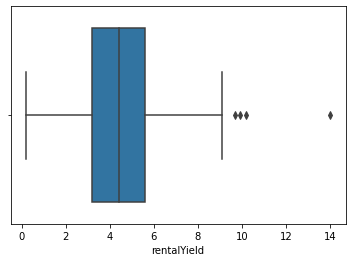

In [172]:
sns.boxplot(x = df['rentalYield'])

The assumption about outliers has been confirmed. Let's define the exact values of the outliers end get rid of them

In [173]:
detect_outliers(df['rentalYield'])

Number of outliers are 4
The outliers are [10.2, 9.9, 14.0, 9.7]
Upper limit is 9.2
Lower limit is -0.399999999999999


As long as there are not too many outliers in the **rentalYield** feature, we can get rid of the rows that contain these outliers

In [174]:
df.shape

(473, 37)

In [175]:
df = remove_outliers(df, 'rentalYield')

The number of rows before removing outliers is  473
The number of rows after removing outliers is  469


In [176]:
df.shape

(469, 37)

In [177]:
max(df['rentalYield'])

9.1

In [178]:
min(df['rentalYield'])

0.2

In [179]:
df['rentalYield'].value_counts()

3.8    19
3.6    17
4.2    15
4.8    15
5.3    13
       ..
8.0     1
8.2     1
1.3     1
7.7     1
8.9     1
Name: rentalYield, Length: 85, dtype: int64

In [180]:
#rentPeriod
df['rentPeriod'].value_counts()

15    468
1       1
Name: rentPeriod, dtype: int64

The feature **rentPeriod** has no variability, so we can get rid of it

In [181]:
df.drop(['rentPeriod'], axis = 1, inplace = True)

In [182]:
#area
df['area'].value_counts()

2.0000    13
1.0000     3
1.5000     3
0.4366     3
1.5045     2
          ..
3.7139     1
0.7085     1
0.2420     1
6.1329     1
3.8181     1
Name: area, Length: 440, dtype: int64

Let's check the feature **area** for outliers

<AxesSubplot:xlabel='area'>

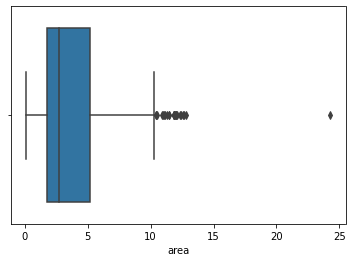

In [183]:
sns.boxplot(x = df['area'])

As we can see there are possibly a lot of outliers, let's calculate number and values

In [184]:
detect_outliers(df['area'])

Number of outliers are 28
The outliers are [11.0799, 11.9532, 12.0078, 11.8356, 11.8355, 11.8638, 12.1274, 12.0482, 10.4194, 11.1498, 24.2772, 10.8946, 10.5002, 11.2863, 12.8, 11.8356, 12.3256, 12.548, 12.4001, 10.3972, 11.8357, 11.8354, 11.8358, 10.9562, 11.4803, 11.8353, 11.4395, 12.6665]
Upper limit is 10.3806
Lower limit is -3.3818


This is a big amount of outliers for some a small dataset, so it is not beneficial to remove the rows. Let's try to apply other methods, for instance Winsorize Method

Let's look at the data distribution for **area** feature

C:\Users\asolo\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area'>

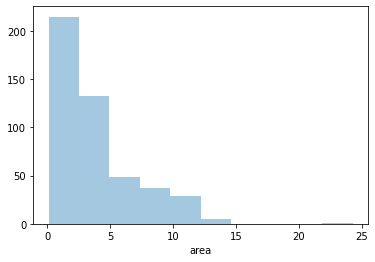

In [185]:
sns.distplot(df['area'], bins=10, kde = False)

We can see that the distribution is right skewed. Let's see how the data of the **area** feature will look like when we apply log transformation.

In [186]:
detect_outliers(np.log(df['area']))

Number of outliers are 21
The outliers are [-1.3420861064555702, -1.8483298207164494, -1.4562877329404256, -1.1338250444238542, -1.1239300966523995, -1.2672676546982498, -1.4188175528254507, -1.0498221244986778, -1.4477443234361131, -1.283016011666389, -1.2761851384398606, -1.7037485919053417, -2.0794415416798357, -2.069887328875024, -1.3371233171134413, -1.7142430268002267, -2.3382122706371966, -1.2468803053372126, -1.2201021862558195, -2.0898959995836948, -1.067986095126349]
Upper limit is 3.2669383947587187
Lower limit is -1.038390847321483


<AxesSubplot:xlabel='area'>

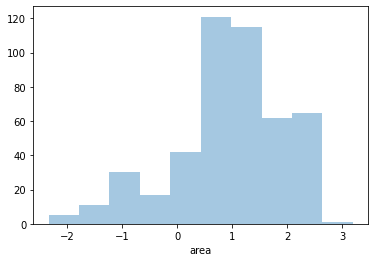

In [187]:
sns.distplot(np.log(df['area']), bins=10, kde = False)

Unfortunately, it seems like Log Transformation doesn't help much to get rid of the outliers. So, let's try to use another approach Winsorize method

In [188]:
df['area'].describe()

count    469.000000
mean       3.828499
std        3.260208
min        0.096500
25%        1.779100
50%        2.733400
75%        5.219700
max       24.277200
Name: area, dtype: float64

In [189]:
df['area_win'] = winsorize(df['area'], (0.01, 0.06))

<AxesSubplot:xlabel='area_win'>

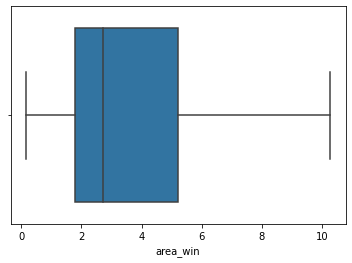

In [190]:
sns.boxplot(x = df['area_win'])

In [191]:
df['area'].describe()

count    469.000000
mean       3.828499
std        3.260208
min        0.096500
25%        1.779100
50%        2.733400
75%        5.219700
max       24.277200
Name: area, dtype: float64

In [192]:
df['area_win'].describe()

count    469.000000
mean       3.718513
std        2.938183
min        0.157500
25%        1.779100
50%        2.733400
75%        5.219700
max       10.276000
Name: area_win, dtype: float64

C:\Users\asolo\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area_win', ylabel='Density'>

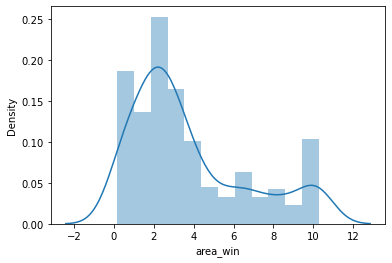

In [193]:
sns.distplot(df['area_win'])

As we can see Winsorize method didn't impact the descriptive statistics much, which is good. However, the distribution after the transformation still remains right skewed. So, probably it makes sense to apply Log Transformation to this new feature later

Now we can remove **area** feature

In [194]:
df.drop(['area'], axis = 1, inplace = True)

In [195]:
#purpose
df['purpose'].value_counts()

01.01 Для ведення товарного сільськогосподарського виробництва     377
01.03 Для ведення особистого селянського господарства               48
Для ведення товарного сільськогосподарського виробництва            19
ведення товарного сільськогосподарського виробництва                13
01.01                                                                3
01.01 для ведення товарного сільськогосподарського виробництва       3
01.01. Для ведення товарного сільськогосподарського виробництва      2
для ведення товарного сільськогосподарського виробництва             2
01.03 для ведення особистого селянського господарства                1
01.04 Для ведення підсобного сільського господарства                 1
Name: purpose, dtype: int64

As we can see there are mainly two values in the **purpose** feature, but they may be written in different ways. Let's convert different variants of the same values to a common standard

In [196]:
df['purpose'] = df['purpose'].apply(lambda x: 1 if ('01.01' in x or 'товарного' in x) else 0)

In [197]:
#purpose
df['purpose'].value_counts()

1    419
0     50
Name: purpose, dtype: int64

In [198]:
#ownership
df['ownership'].value_counts()

Приватна власність    469
Name: ownership, dtype: int64

Let's remove **ownership** feature as long as it doens't have variability

In [199]:
df.drop(['ownership'], axis = 1, inplace = True)

In [200]:
#koatuuLocation
df['koatuuLocation'].value_counts()

Щасливе, Ювілейна, Херсонський, Херсонська, Україна             39
Роменська, Роменський, Сумська, Україна                         28
Тягинська, Бериславський, Херсонська, Україна                   24
Новорайська, Бериславський, Херсонська, Україна                 16
Тростянецька, Охтирський, Сумська, Україна                      15
                                                                ..
Глобинська, Кременчуцький, Полтавська, Україна                   1
Адампіль, Старосинявська, Хмельницький, Хмельницька, Україна     1
Калинівська, Бериславський, Херсонська, Україна                  1
Чигиринська, Черкаський, Черкаська, Україна                      1
Скадовка, Чаплинська, Каховський, Херсонська, Україна            1
Name: koatuuLocation, Length: 99, dtype: int64

It looks like the feature **koatuuLocation** had some missing values in the original dataset. Let's check if it still has them after previous pre-processing

In [201]:
df['koatuuLocation'].isnull().sum()

4

Well, as long as this feature has few missing values let's remove the rows with these missing values

In [202]:
df = df[df['koatuuLocation'].notna()]

In [203]:
df['koatuuLocation'].isnull().sum()

0

In [204]:
#geoPath
df['geoPath'].value_counts()

[1, 22, 151, 1717, 27432]    39
[1, 19, 134, 1529]           28
[1, 22, 147, 1679]           24
[1, 22, 147, 1678]           16
[1, 19, 133, 1521]           15
                             ..
[1, 3, 44, 541]               1
[1, 22, 147, 1673]            1
[1, 18, 130, 1481]            1
[1, 19, 133, 1522, 22910]     1
[1, 15, 115, 1274]            1
Name: geoPath, Length: 99, dtype: int64

According to the distribution of the values it becomes obvious that the feature **geoPath** is the same as the previos feature **koatuuLocation** displayed in different form. I believe we can remove it

In [205]:
df.drop(['geoPath'], axis = 1, inplace = True)

In [206]:
#geoLocation
df['geoLocation'].value_counts()

SRID=4326;POINT (50.69054490955153 33.37732208667056)    1
SRID=4326;POINT (50.61222514702568 33.52473294267352)    1
SRID=4326;POINT (49.55453016088852 36.06473278742061)    1
SRID=4326;POINT (50.72965787551479 33.41378329859334)    1
SRID=4326;POINT (50.63996915919979 33.49371109866767)    1
                                                        ..
SRID=4326;POINT (46.98708327708566 33.32057385143921)    1
SRID=4326;POINT (46.46315328199238 33.2414374593622)     1
SRID=4326;POINT (48.02051754977626 35.09291503931124)    1
SRID=4326;POINT (46.86819781145947 33.23361525107096)    1
SRID=4326;POINT (46.64872667630685 33.96451040869502)    1
Name: geoLocation, Length: 465, dtype: int64

In [207]:
df['geoLocation'].nunique()

465

As long as all the values of the **geoLocation** feature are unique, it doesn't make sense to keep this feature for the further analysis. Let's remove it

In [208]:
df.drop(['geoLocation'], axis = 1, inplace = True)

In [209]:
#geoCoordinates
df['geoCoordinates'].value_counts()

[46.84015224843165, 31.481088705434278]    1
[46.495263399526415, 33.27388659424163]    1
[49.69439042782902, 39.32845092949787]     1
[49.15637241400208, 32.475556734346334]    1
[47.019422943646504, 33.40817859036]       1
                                          ..
[50.98133733534587, 29.917473526257876]    1
[50.15642204270612, 34.92256829626384]     1
[46.83708269385274, 31.542234579583315]    1
[50.39530387361414, 34.251503834135754]    1
[46.651314252114446, 33.92236215258888]    1
Name: geoCoordinates, Length: 465, dtype: int64

In [210]:
df['geoCoordinates'].nunique()

465

Similarly, the feature **geoCoordinates** contains all unique values. So, we can remove it too.

In [211]:
df.drop(['geoCoordinates'], axis = 1, inplace = True)

In [212]:
#ownerType
df['ownerType'].value_counts()

1    465
Name: ownerType, dtype: int64

The feature has no variability, so let's remove it

In [213]:
df.drop(['ownerType'], axis = 1, inplace = True)

In [214]:
#ownerEdrpou
df['ownerEdrpou'].value_counts()

2802220952    6
2043814437    5
2172714889    4
1819702127    4
3027203880    4
             ..
2722508444    1
2883117786    1
2047312603    1
1951910110    1
2389307252    1
Name: ownerEdrpou, Length: 336, dtype: int64

In [215]:
#ownerName
df['ownerName'].value_counts()

Отян Сергій Григорович         6
Крошка Микола Дмитрович        5
Ізюмська Марія Іванівна        4
Пікулик Ірина Станіславівна    4
Святенко Олександр Павлович    4
                              ..
Ільченко Людмила Андріївна     1
Бобро Валентина Петрівна       1
Маріняк Микола Григорович      1
Козін Олена Олексіївна         1
Калашинська Олена Петрівна     1
Name: ownerName, Length: 336, dtype: int64

According to the distribution of the values it becomes obvious that the feature **ownerName** is the same as the previos feature **ownerEdrpou** displayed in different form. I believe we can remove it

In [216]:
df.drop(['ownerName'], axis = 1, inplace = True)

In [217]:
#ownerPhone
df['ownerPhone'].value_counts()

3.809635e+11    5
3.809319e+11    4
3.805021e+11    4
3.806623e+11    4
3.809942e+11    4
               ..
3.805020e+11    1
3.806618e+11    1
3.809735e+11    1
3.805003e+11    1
3.811111e+11    1
Name: ownerPhone, Length: 267, dtype: int64

The feature **ownerPhone** is also kind of a duplication of the **ownerEdrpou** feature. Also it has a lot of missing values. So we can remove it.

In [218]:
df.drop(['ownerPhone'], axis = 1, inplace = True)

In [219]:
#renterCompany
df['renterCompany'].value_counts()

17.0    145
22.0     85
20.0     58
23.0     51
18.0     31
19.0     30
21.0     30
15.0     15
16.0      8
14.0      8
13.0      4
Name: renterCompany, dtype: int64

In [220]:
df['renterCompany'].isnull().sum()

0

In [221]:
#renterType
df['renterType'].value_counts()

2    465
Name: renterType, dtype: int64

The feature **renterType** has no variability, so we can get rid of this feature

In [222]:
df.drop(['renterType'], axis = 1, inplace = True)

In [223]:
#renterEdrpou
df['renterEdrpou'].value_counts()

41101589    145
34264631     85
41104731     58
41105190     51
41107067     31
41102163     30
41103827     30
41102844     15
41104967      8
41099127      8
41481188      4
Name: renterEdrpou, dtype: int64

In [224]:
#renterName
df['renterName'].value_counts()

ТОВ "ЮТС-Агропродукт"                         145
ТОВ "Райз Північ"                              85
ТОВ "Райз-Схід"                                58
ТОВ "Гетьманське"                              51
ТОВ "Південь Агро Інвест"                      31
ТОВ "Агро-Край"                                30
ТОВ "Аграрне підприємство "Придніпровське"     30
ТОВ "Виробниче підприємство "Полісся"          15
ТОВ "Поділля Агропродукт"                       8
ТОВ "Західна Агровиробнича компанія"            8
ТОВ "Агрокомпанія Прикарпаття"                  4
Name: renterName, dtype: int64

Basically the features **renterEdrpou** and **renterName** are the same value represented in the different ways, so we need to get rid of one of them. Probably, let's get rid of the **renterName** feature

In [225]:
df.drop(['renterName'], axis = 1, inplace = True)

In [226]:
#renterContactName
df['renterContactName'].value_counts()

Семенчук Оксана Олександрівна     118
Горобець Рената Володимирівна      58
Третьяков Віталій Васильович       51
Батрак Мирослава Володимирівна     33
Люц Вікторія Юріївна               23
Семенчук Оксана Александровна      22
Щур Вікторія Вікторівна            16
Вовк Юрій Іванович                  8
Вовк Олена Анатоліївна              8
Мазур Олексій Михайлович            7
Налисник Наталія Іванівна           2
Кохно Юрій Антонович                2
оробець Рената Володимирівна        1
+380 (97) 589-80-43                 1
1                                   1
Name: renterContactName, dtype: int64

The **renterContactName** feature bring no extra value to the information, because it just represents contact persons of particular renter complanies. Apart from that it has a lot of missing values. So, it makes sense to get rid of this feature

In [227]:
df.drop(['renterContactName'], axis = 1, inplace = True)

The same is valid for the **renterContactPhone** feature

In [228]:
df.drop(['renterContactPhone'], axis = 1, inplace = True)

In [229]:
#canEdit
df['canEdit'].value_counts()

False    465
Name: canEdit, dtype: int64

The **canEdit** feature looks like a purely technical feature without any variability also. Sp we can safely remove it from the dataset

In [230]:
df.drop(['canEdit'], axis = 1, inplace = True)

In [231]:
#author
df['author'].value_counts()

Series([], Name: author, dtype: int64)

The feature **author** is a technical feature with all empty values. Removing it.

In [232]:
df.drop(['author'], axis = 1, inplace = True)

In [233]:
#owner
df['owner'].value_counts()

{'id': 6, 'title': 'ULF', 'avatar': '/uploads/staff/holdingprofile/2021/06/30/ulf-logo.jpg'}    465
Name: owner, dtype: int64

The **owner** feature is another technical feature without variability. Removing it as well

In [234]:
df.drop(['owner'], axis = 1, inplace = True)

In [235]:
#isAvailable
df['isAvailable'].value_counts()

True     359
False    106
Name: isAvailable, dtype: int64

In [238]:
df = df[df.isAvailable == True]

#Let's convert **isAvailable** feature from boolean type to int

In [ ]:
#df['isAvailable'] = df['isAvailable'].apply(lambda x: 1 if True else 0)

In [239]:
#gallary
df['gallary'].value_counts()

[]    359
Name: gallary, dtype: int64

The last feature **gallary**  - is another technical feature with all empty values

In [240]:
df.drop(['gallary'], axis = 1, inplace = True)

#### Let's see now what dataset we have after EDA

In [241]:
df.shape

(359, 21)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 474
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    359 non-null    int64  
 1   status                359 non-null    int64  
 2   cadastre              359 non-null    object 
 3   price                 359 non-null    int64  
 4   pricePerOne           359 non-null    int64  
 5   estimatePrice         359 non-null    int64  
 6   rentRate              359 non-null    int64  
 7   rentalYield           359 non-null    float64
 8   purpose               359 non-null    int64  
 9   koatuuLocation        359 non-null    object 
 10  ownerEdrpou           359 non-null    int64  
 11  renterCompany         359 non-null    float64
 12  renterEdrpou          359 non-null    int64  
 13  isAvailable           359 non-null    bool   
 14  estimateMonth         359 non-null    int64  
 15  estimateDay           3

In [243]:
df.to_csv('land_lots_eda_available.csv', index=False)